In [1]:
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt
import moscot
from moscot.problems.time import TemporalProblem
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from muon import atac as ac
import numpy as np
import itertools
import pandas as pd

In [2]:
print(moscot.__version__)

0.1


In [3]:
adata = sc.read_h5ad("/lustre/groups/ml01/workspace/moscot_paper/pancreas/pancreas_multiome_2022_processed.h5ad")

In [4]:
adata.obs['time'] = adata.obs.apply(lambda x: 14.5 if x["sample"]=="E14.5" else 15.5, axis=1)

In [5]:
adata_gex = adata[:, adata.var["modality"]=="GEX"].copy()

In [6]:
sc.pp.normalize_total(adata_gex, target_sum=1e4)
sc.pp.log1p(adata_gex)

tp_dummy = TemporalProblem(adata_gex)
tp_dummy = tp_dummy.score_genes_for_marginals(gene_set_proliferation="mouse", gene_set_apoptosis="mouse")
tp_dummy = tp_dummy.prepare(time_key="time")

/home/icb/dominik.klein/miniconda3/envs/jax_gpu3/lib/python3.8/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


/home/icb/dominik.klein/miniconda3/envs/jax_gpu3/lib/python3.8/site-packages/scanpy/tools/_score_genes.py:151: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  for cut in np.unique(obs_cut.loc[gene_list]):


INFO     Computing pca with `n_comps=30` using `adata.X`                                     


In [7]:
n_obs_late = adata.obs["time"].value_counts()[15.5]

In [8]:
adata_gex.obs["a"] = np.hstack((tp_dummy[14.5, 15.5].prior_growth_rates/(tp_dummy[14.5, 15.5].prior_growth_rates).sum(), np.zeros((n_obs_late,))))

In [9]:
adata_gex.obs[["a"]].to_csv("marginals.csv")

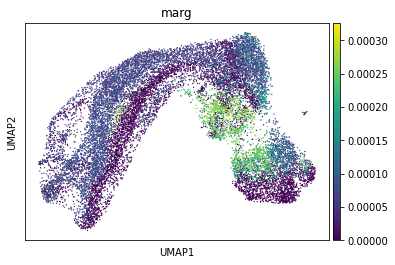

In [22]:
sc.pl.umap(adata_gex, color=["marg"])